In [1]:
import pandas as pd
df=pd.read_csv(r'C:\Users\SREEJA\Desktop\pandas\youtube_study_distraction_dataset_300.csv')
df.head()

,Date,Study_Video,Distracted,Distract_Type,Watch_Time_Minutes,Focus_Level
0,2025-02-14,Power BI Tutorial,Yes,None,102.0,Low
1,2025-02-17,Excel Tips,No,None,175.0,Medium
2,2025-04-28,Excel Tips,Yes,Music,71.0,High
3,2025-03-06,Pandas Course,No,None,113.0,High
4,2025-03-09,Data Analysis,No,None,78.0,Medium


In [3]:
df.shape

(300, 6)

In [4]:
df.isnull().sum()

Date                  15
Study_Video           15
Distracted            15
Distract_Type         15
Watch_Time_Minutes    15
Focus_Level           15
dtype: int64

In [6]:
df['Watch_Time_Minutes'].fillna(df['Watch_Time_Minutes'].mean(),inplace=True)

In [7]:
df.isnull().sum()

Date                  15
Study_Video           15
Distracted            15
Distract_Type         15
Watch_Time_Minutes     0
Focus_Level           15
dtype: int64

In [11]:
df['Focus_Level'].fillna(df['Focus_Level'].mode()[0],inplace=True)#to take 1st single value

In [12]:
df.isnull().sum()

Date                  15
Study_Video           15
Distracted            15
Distract_Type         15
Watch_Time_Minutes     0
Focus_Level            0
dtype: int64

In [14]:
df['Study_Video'].fillna(df['Study_Video'].mode()[0],inplace=True)
df['Distracted'].fillna(df['Distracted'].mode()[0],inplace=True)

In [15]:
df.loc[df['Distracted']=="No",'Distract_Type']='None'   #loc is used for logical condition

In [16]:
df['Distract_Type'].fillna('Unknown',inplace=True)


In [17]:
df.isnull().sum()

Date                  15
Study_Video            0
Distracted             0
Distract_Type          0
Watch_Time_Minutes     0
Focus_Level            0
dtype: int64

In [19]:
df['Date']=pd.to_datetime(df['Date'])
df['Date'].fillna(method='ffill',inplace=True)


In [20]:
df.isnull().sum()

Date                  0
Study_Video           0
Distracted            0
Distract_Type         0
Watch_Time_Minutes    0
Focus_Level           0
dtype: int64

In [21]:
df.describe()

,Watch_Time_Minutes
count,300.000000
mean,95.414035
std,46.578848
min,11.000000
25%,55.000000
50%,95.414035
75%,130.250000
max,180.000000


In [24]:
df['Month']=df['Date'].dt.month
df['WeekDay']=df['Date'].dt.day_name()
df.head()

,Date,Study_Video,Distracted,Distract_Type,Watch_Time_Minutes,Focus_Level,Month,WeekDay
0,2025-02-14,Power BI Tutorial,Yes,None,102.0,Low,2,Friday
1,2025-02-17,Excel Tips,No,None,175.0,Medium,2,Monday
2,2025-04-28,Excel Tips,Yes,Music,71.0,High,4,Monday
3,2025-03-06,Pandas Course,No,None,113.0,High,3,Thursday
4,2025-03-09,Data Analysis,No,None,78.0,Medium,3,Sunday


In [30]:
focus_map={'Low':1,'Medium':2,'High':3}
df["Focus_score"]=df['Focus_Level'].map(focus_map)
df["Focus_score"].mean()

2.0533333333333332

In [31]:
df['Distracted'].value_counts(normalize=True)*100   #to know the distracted values vs non distrated values


Yes    58.333333
No     41.666667
Name: Distracted, dtype: float64

In [32]:
df[df["Distracted"]=="Yes"]["Distract_Type"].value_counts()

None      52
Reels     27
Shorts    25
Gaming    25
Music     24
Comedy    22
Name: Distract_Type, dtype: int64

In [33]:
df.shape

(300, 9)

In [34]:
df.groupby("Focus_Level")['Watch_Time_Minutes'].mean()

Focus_Level
High      95.710702
Low       88.995906
Medium    99.805898
Name: Watch_Time_Minutes, dtype: float64

In [35]:
df.groupby("Study_Video")["Focus_score"].mean()


Study_Video
Data Analysis        2.069767
Excel Tips           1.914286
Pandas Course        2.098361
Power BI Tutorial    2.060606
Python Tutorial      2.113636
SQL Lecture          2.113636
Statistics Class     1.950000
Name: Focus_score, dtype: float64

In [36]:
df.groupby("Distracted")["Focus_score"].mean()


Distracted
No     1.968000
Yes    2.114286
Name: Focus_score, dtype: float64

In [37]:
df.groupby("Watch_Time_Minutes")["Focus_score"].mean()


Watch_Time_Minutes
11.0     1.00
12.0     2.00
14.0     3.00
15.0     2.00
17.0     2.00
         ... 
174.0    2.00
175.0    2.25
176.0    3.00
177.0    1.00
180.0    2.00
Name: Focus_score, Length: 140, dtype: float64

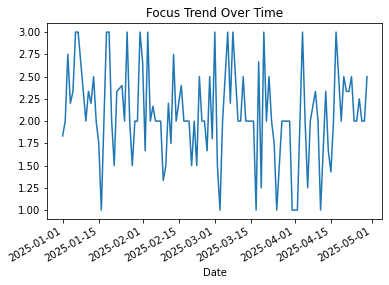

In [40]:

import matplotlib.pyplot as plt
%matplotlib inline
df.groupby("Date")["Focus_score"].mean().plot()
plt.title("Focus Trend Over Time")
plt.show()


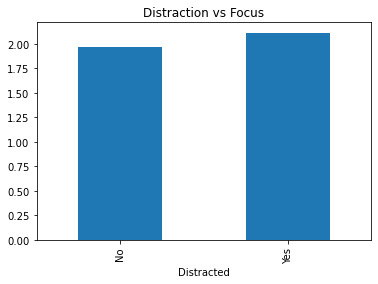

In [41]:
df.groupby("Distracted")["Focus_score"].mean().plot(kind="bar")
plt.title("Distraction vs Focus")
plt.show()


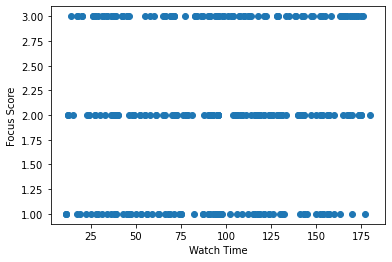

In [42]:
plt.scatter(df["Watch_Time_Minutes"], df["Focus_score"])
plt.xlabel("Watch Time")
plt.ylabel("Focus Score")
plt.show()
